# What I am trying to find out

In my opinion one of the most important questions is the general Happiness in Life and how does it correlate to external factors. So I tried to have a look at three relationships according to happiness.

How does happines relate to jyour income? 

# The Dataset(s)

As a basis I used a dataset of the ESS (European Social Studies) which questions people all over Europe. The same questions where asked  between 2002 and 2018 every two years. I took all countries into account that participated in every study, which are Belgium, Finland, France, Germany, Hungary, Ireland, Netherlands, Norway, Poland, Portugal, Slovenia, Spain, Sweden, Switzerland, Uk.

Two have comparisons between the countries, also the annual GDP per capita und inflation rate were taken into account.

ESS from https://www.europeansocialsurvey.org/downloadwizard/

Inflation rates from https://data.oecd.org/price/inflation-cpi.htm

GDP per Capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2020&start=2003&view=map

The ESS data has been prepared as follows

Therefore I will make a quick overview what column is scaled in which way. The neccessary information can be found in the html file:

Trust people:                 Most people can be trusted, 0-10 (0 Noone can be trusted, 10 Most ppl can be trusted)

People fair:                  People rather try to take advantage or are fair, 0-10 (0 take advantage, 10 are fair)

People helpful:               Most people helpful or only look fo themselves, 0-10 (0 themselves, 10 hoepful)

Trust parliament:             How big is trust in parliament, 0-10 (0 no trust, 10 high trust)

Trust Legal:                  How big is trust in legal system, 0-10 (0 no trust, 10 high trust)

Trust police:                 How big is trust in police, 0-10 (0 no trust, 10 high trust)

Trust politicians:            How big is trust in politicians, 0-10 (0 no trust, 10 high trust)

Trust parties:                How big is trust in political parties, 0-10 (0 no trust, 10 high trust)

Trust EU:                     How big is trust in EU, 0-10 (0 no trust, 10 high trust)

Trust UN:                     How big is trust in UN, 0-10 (0 no trust, 10 high trust)

Left Right:                   Rather left or right wing, 0-10 (0 left, 10 right)

Satisfied with life:          How satisfied with life as a whole, 0-10 (0 dissatisfied, 10 satisfied)

Satisfied with economy:       How satisfied with countries economy, 0-10 (0 dissatisfied, 10 satisfied)

Satisfied with gov:           How satisfied with contries government, 0-10 (0 dissatisfied, 10 satisfied)

Satisfied with democracy:     How satisfied with democracy in country, 0-10 (0 dissatisfied, 10 satisfied)

Satisfied with eductation:    How satisfied with with education system in country, 0-10 (0 dissatisfied, 10 satisfied)

More equality:                Should government do more for income equality, 1-5 (1 do more, 5 not do more)

EU unification:               Gone to far or not far enough, 0-10 (0 too far, 10 not far enough)

Happiness:                    How happy are you, 0-10 (0 unhappy, 10 happy)

Attached to country:          How attached to contry, 0-10 (0 not attached 10 very attached)

Attached to EU:               How attached to Europe, 0-10 (0 not attached 10 very attached)

Num ppl household:            Number of people in household

Gender:                       Gender: 1 Male, 2 Female

Age:                          Age

Employment Relation:

            1	Employee
            2	Self-employed
            3	Working for own family business

Highest Education:

            1	ES-ISCED I, less than lower secondary
            2	ES-ISCED II, lower secondary
            3	ES-ISCED IIIb, lower tier upper secondary
            4	ES-ISCED IIIa, upper tier upper secondary
            5	ES-ISCED IV, advanced vocational, sub-degree
            6	ES-ISCED V1, lower tertiary education, BA level
            7	ES-ISCED V2, higher tertiary education, >= MA level
                              
Self organize work 1:         I can organize my work myself, 0-10 (0 no control, 10 full control)

Self organize work 2-9:       I can organize my work myself, 0-10 (0 no control, 10 full control)

Time at work:                 Total number of hours worked per week (including overtime)

Net income 1-3:               Net household income, 1-10 (10 categories, see below)

Net income 4-9:               Net household income, 1-10 (1 first decil (lowest 10%), 10 tenth decil (Highest 10%))

Happy with income:            Generally happy with household income, 1-4 (1 Living comfortly, 4 Having big difficulties)


General values:

            6, 66, 666, 6666:     Not applicaple 
            7, 77, 777, 7777:     Refusal
            8, 88, 888, 8888:     Don't know
            9, 99, 999, 9999:     No answer


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from import_prep import file_importer

# Importing the data using the importer and preprocessor

list_of_countries = ['Belgium', 'Finland', 'France', 'Germany', 'Hungary', 'Ireland', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

ess_pp1, gdp_data, gdp_growth_data, infl, gini = file_importer(list_of_countries)




# Preparing the data

I have three different datasets to take a look at.

To get started first I will have look at the GDP and how it evolved over time for the countries I am looking at.

<AxesSubplot:>

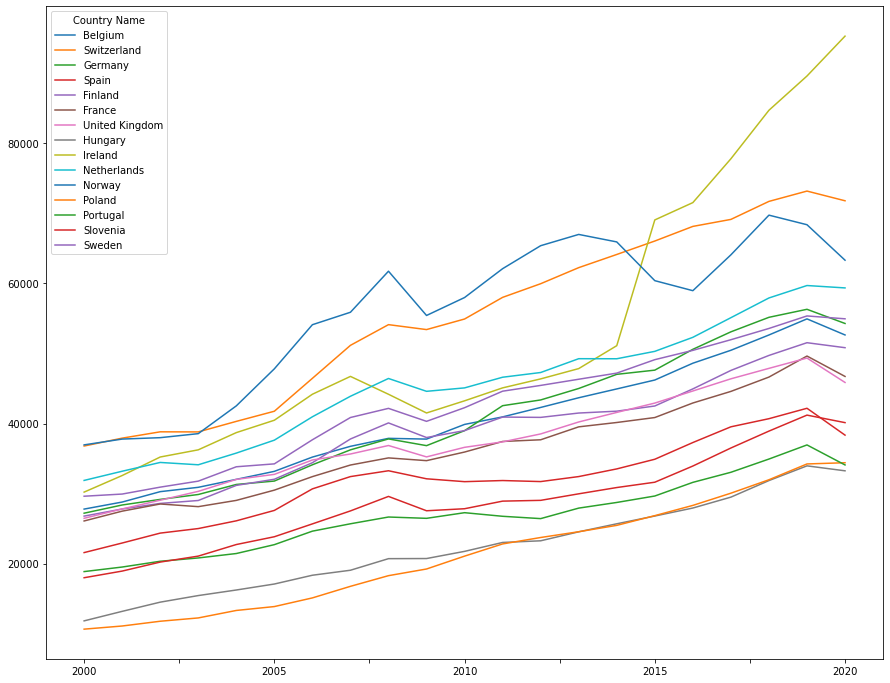

In [6]:
# list of relevant countries and years

list_of_years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

# Plot results
plt.subplots(figsize=(15, 12))
ax = plt.gca()

gdp_data.plot(kind='line',ax=ax)


As it looks like, many of them are growing rather parallel. But it might be worth it to take a look at the growth rate, since getting from 10k to 20k is a bigger increase than gowing from 30k to 40k

<AxesSubplot:>

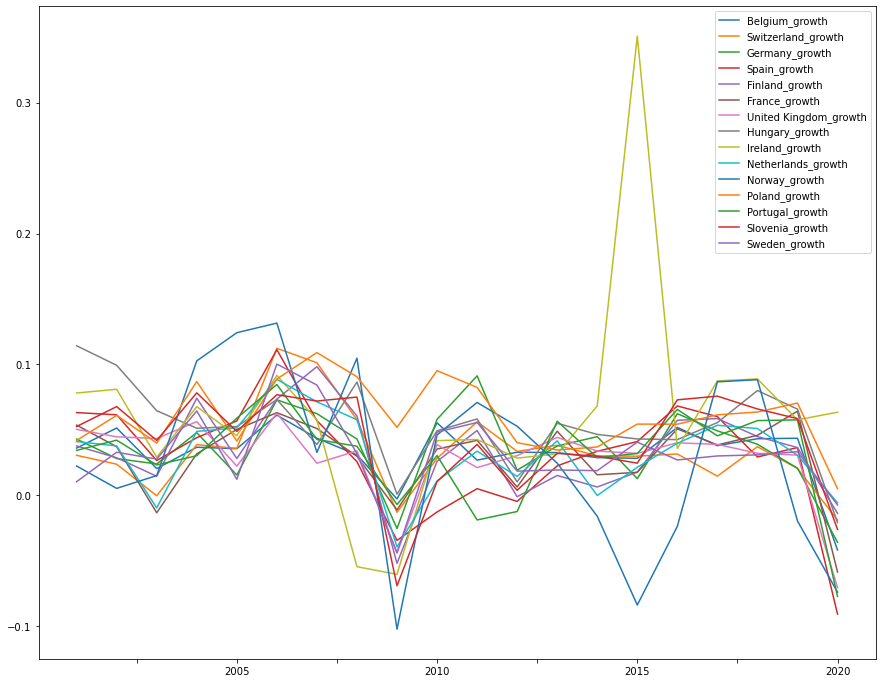

In [7]:
# Plot rates
plt.subplots(figsize=(15, 12))
ax = plt.gca()

gdp_growth_data.plot(kind='line',ax=ax)

Next I will have a closer look at the income data.

For ESS 1-3 the income was measured on a fix level of euros available. These stayed the same over the 4 years. The exyct values can be found in the income.png


For the net household income the way it was measured changed between 3rd and 4th questionaire. From the 4th on according to the Appendix 5 documentation of the 4th ESS round, the countries income range is split into ten equal decils with 1 being the lowest group and 10 the highest. So the median is the borderline between 5th and 6th.

This is a significant change, since the countries' general income range is taken into account, whereas within the first three ESS economically stronger and weeker nations had the same income ranges.

Although the actual income ranges are available for each country and each ESS I will have a look at that later.
At first I will have a look at the data from 2008 to 2018 so rounds 4-9.

# Modelling the data

Now I will start to have a look at the first question. How do job factors like money earned and time spend at work or flexibility at work relate to happiness and well being?

So having a look a the data there are a few columns of interest:

Happiness / Well being: 

    Happiness
    Satisfied with life
    
income related:
    
    net household income
    number of persons in household
    
    
and also "how happy are you with your current income" might play an important role.

Now at first I will have a quick look how correlated Happiness and satisfaction with life are.
        

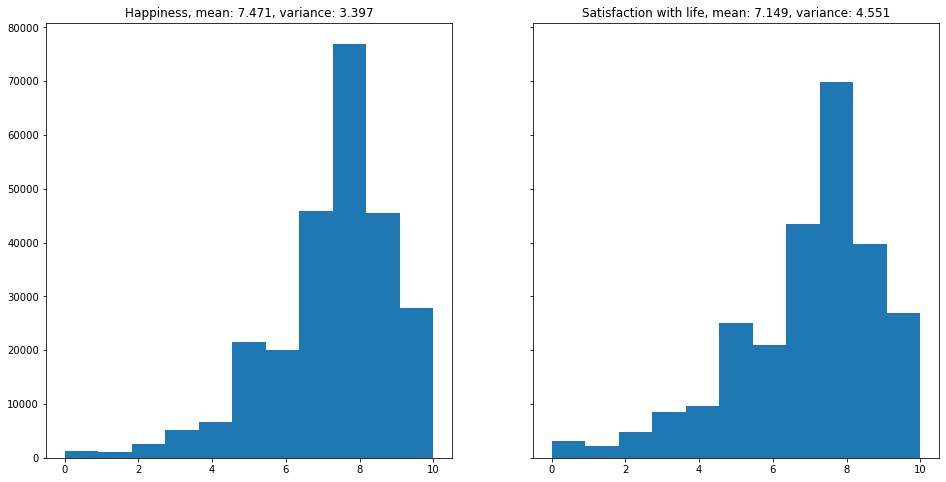

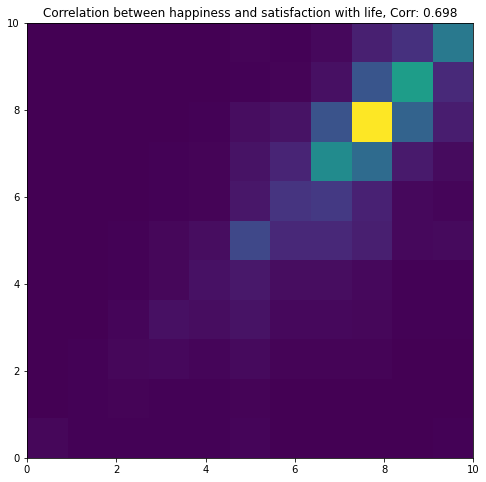

In [8]:
# First drop all rows that do not have a sufficient answer

ess_happy_rel = ess_pp1.drop(ess_pp1[(ess_pp1['Satisfied with life'] > 10) | (ess_pp1['Happiness'] > 10)].index)

# Get basic statistics data

mean_happy = ess_happy_rel['Happiness'].mean()
var_happy = ess_happy_rel['Happiness'].var()
mean_sat = ess_happy_rel['Satisfied with life'].mean()
var_sat = ess_happy_rel['Satisfied with life'].var()
corr_hap_sat = ess_happy_rel['Happiness'].corr(ess_happy_rel['Satisfied with life'])

# Plot
fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= [16,8])
ax1.hist(ess_happy_rel['Happiness'], bins=11)
ax1.title.set_text('Happiness, mean: %.3f, variance: %.3f' %(mean_happy, var_happy))
ax2.hist(ess_happy_rel['Satisfied with life'], bins=11)
ax2.title.set_text('Satisfaction with life, mean: %.3f, variance: %.3f' %(mean_sat, var_sat))

fig2, ax3 = plt.subplots(1, 1, sharey=True, figsize= [8,8])
ax3.hist2d(ess_happy_rel['Happiness'], ess_happy_rel['Satisfied with life'], bins=11)
ax3.title.set_text('Correlation between happiness and satisfaction with life, Corr: %.3f' %corr_hap_sat)

What can be seen from that is pretty much what was expected. Happiness and general satisfaction with the rspective own life are highly correlated.

So next we will take the happines with the own income into account:

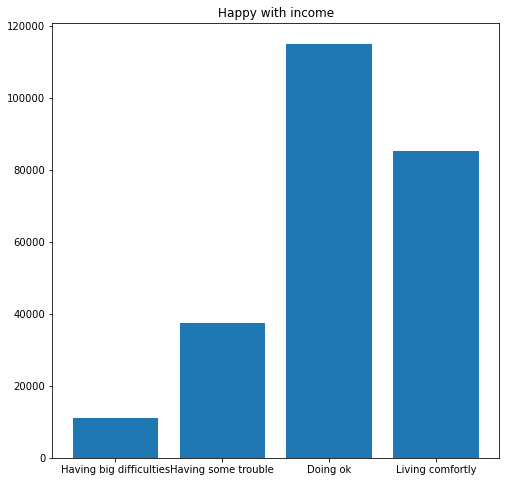

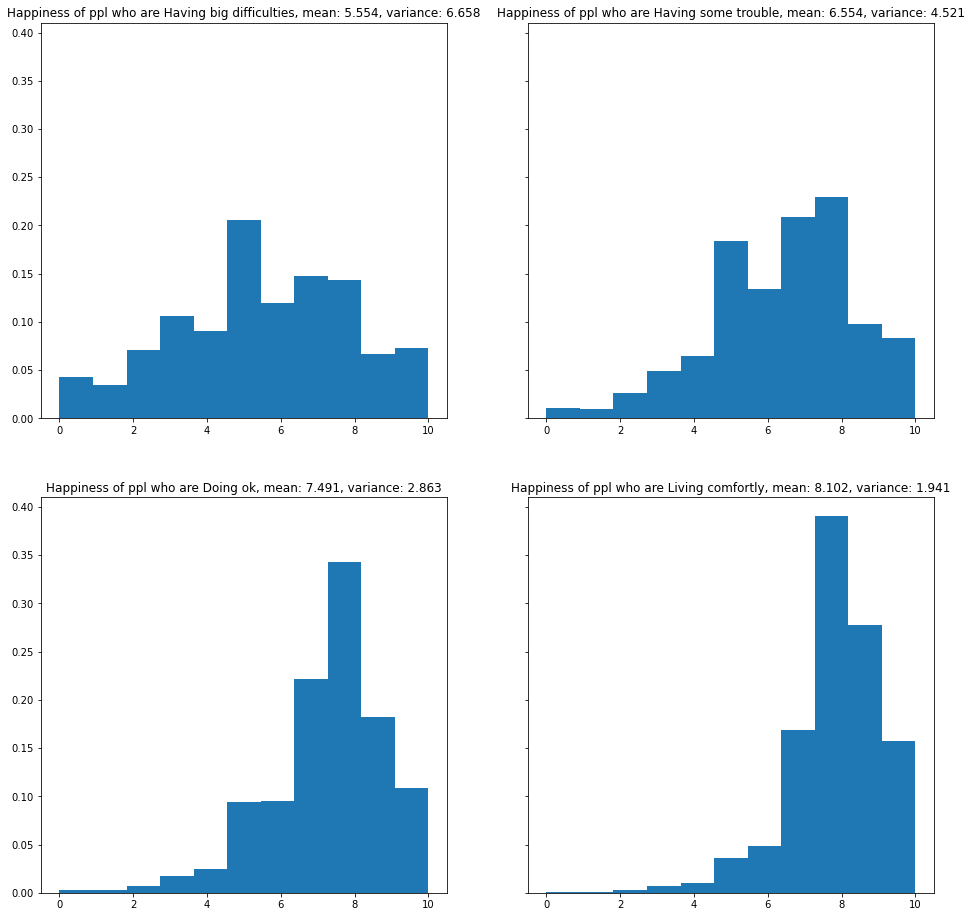

In [9]:
# Remove persons that did not give an answer to that question

ess_happy_rel_income = ess_happy_rel.dropna(subset=['Happy with income'])


# At first I will have a look at the distribution of happiness with income in general:

happy_income_distribution = ess_happy_rel_income['Happy with income'].value_counts()

x = ['Having big difficulties', 'Having some trouble', 'Doing ok', 'Living comfortly']
y = [happy_income_distribution['Having big difficulties'], happy_income_distribution['Having some trouble'],
    happy_income_distribution['Doing ok'], happy_income_distribution['Living comfortly']]


fig, ax1 = plt.subplots(1, 1, sharey=True, figsize= [8,8])
ax1.bar(x,y)
ax1.title.set_text('Happy with income')

# Next I will have a look at the distributions of happiness in each of the four income happiness categories:

ess_happy_rel_income_1 = ess_happy_rel_income[ess_happy_rel_income['Happy with income'] == 'Having big difficulties']
ess_happy_rel_income_2 = ess_happy_rel_income[ess_happy_rel_income['Happy with income'] == 'Having some trouble']
ess_happy_rel_income_3 = ess_happy_rel_income[ess_happy_rel_income['Happy with income'] == 'Doing ok']
ess_happy_rel_income_4 = ess_happy_rel_income[ess_happy_rel_income['Happy with income'] == 'Living comfortly']

mean_1 = ess_happy_rel_income_1['Happiness'].mean()
mean_2 = ess_happy_rel_income_2['Happiness'].mean()
mean_3 = ess_happy_rel_income_3['Happiness'].mean()
mean_4 = ess_happy_rel_income_4['Happiness'].mean()
var_1 = ess_happy_rel_income_1['Happiness'].var()
var_2 = ess_happy_rel_income_2['Happiness'].var()
var_3 = ess_happy_rel_income_3['Happiness'].var()
var_4 = ess_happy_rel_income_4['Happiness'].var()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize= [16,16])
ax1.hist(ess_happy_rel_income_1['Happiness'], density=True, bins=11)
ax1.title.set_text('Happiness of ppl who are Having big difficulties, mean: %.3f, variance: %.3f' %(mean_1, var_1))
ax2.hist(ess_happy_rel_income_2['Happiness'], density=True, bins=11)
ax2.title.set_text('Happiness of ppl who are Having some trouble, mean: %.3f, variance: %.3f' %(mean_2, var_2))
ax3.hist(ess_happy_rel_income_3['Happiness'], density=True, bins=11)
ax3.title.set_text('Happiness of ppl who are Doing ok, mean: %.3f, variance: %.3f' %(mean_3, var_3))
ax4.hist(ess_happy_rel_income_4['Happiness'], density=True, bins=11)
ax4.title.set_text('Happiness of ppl who are Living comfortly, mean: %.3f, variance: %.3f' %(mean_4, var_4))

So in general, people who are getting better along are happierer, than those who don't. The mean value gets bigger and the variance smaller, the better people are getting along with their income. This is not very suprising so far.

So next we will have a direct look at the income. First I will have a look at the income groups in ESS 4-9, so those who are normalized to each country.

I will start by taking a look at the income distribtion, which should be a uniform distribution, and the happiness figure of those who answered the income question:


17.38% did not give an answer to the income question.


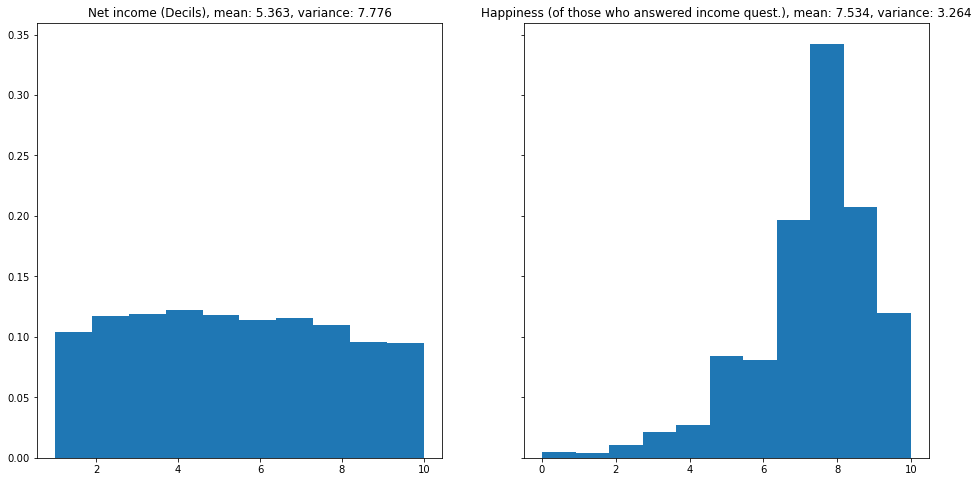

In [10]:
# Drop rows that don't contain the data needed

ess_happy_and_income_4_9 = ess_pp1.drop(ess_pp1[(ess_pp1['Net income 4-9'] > 10) | (ess_pp1['Happiness'] > 10)].index)
ess_happy_and_income_4_9 = ess_happy_and_income_4_9.dropna(subset=['Net income 4-9'])

# Look how many ppl did not answer the income question.

ess_income_4_9_all = ess_pp1.dropna(subset=['Net income 4-9'])
ess_income_4_9_valid = ess_income_4_9_all.drop(ess_income_4_9_all[(ess_income_4_9_all['Net income 4-9'] > 10)].index)


print('%.2f%% did not give an answer to the income question.' %((1 - (ess_income_4_9_valid.shape[0] / ess_income_4_9_all.shape[0])) * 100 ))

# Plot income and happiness figures

mean_hap = ess_happy_and_income_4_9['Happiness'].mean()
var_hap = ess_happy_and_income_4_9['Happiness'].var()
mean_inc = ess_happy_and_income_4_9['Net income 4-9'].mean()
var_inc = ess_happy_and_income_4_9['Net income 4-9'].var()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= [16,8])
ax1.hist(ess_happy_and_income_4_9['Net income 4-9'], density=True)
ax1.title.set_text('Net income (Decils), mean: %.3f, variance: %.3f' %(mean_inc, var_inc))
ax2.hist(ess_happy_and_income_4_9['Happiness'], density=True, bins=11)
ax2.title.set_text('Happiness (of those who answered income quest.), mean: %.3f, variance: %.3f' %(mean_hap, var_hap))

The income figure should be a uniform distribution. But as it looks like, there are less answers of ppl who have a very high income. But also 17.38% did not answer the income question, maybe that explains the difference. The happiness figure of those who answered however looks much the same as the general one, with a slighly higher mean and alightly lower variance.

So now I will have a look at the correlation between income and happiness:

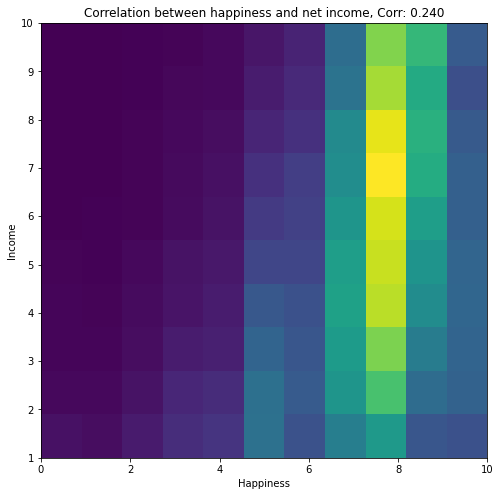

In [11]:
# Correlation

corr_hap_inc = ess_happy_and_income_4_9['Happiness'].corr(ess_happy_and_income_4_9['Net income 4-9'])

# Plot 

f, ax1 = plt.subplots(1, 1, sharey=True, figsize= [8,8])
ax1.hist2d(ess_happy_and_income_4_9['Happiness'], ess_happy_and_income_4_9['Net income 4-9'], bins=[11,10])
ax1.set_xlabel('Happiness')
ax1.set_ylabel('Income')
ax1.title.set_text('Correlation between happiness and net income, Corr: %.3f' %corr_hap_inc)

There seems to be a bit of a correlation between income and happiness, but it is weaker than I suspected. Within the lower four income groups there seems to be significant increase in happiness with higher income, but above that, the changes seem to be rather low. So lets quickly get a look at that and go a bit into detail:

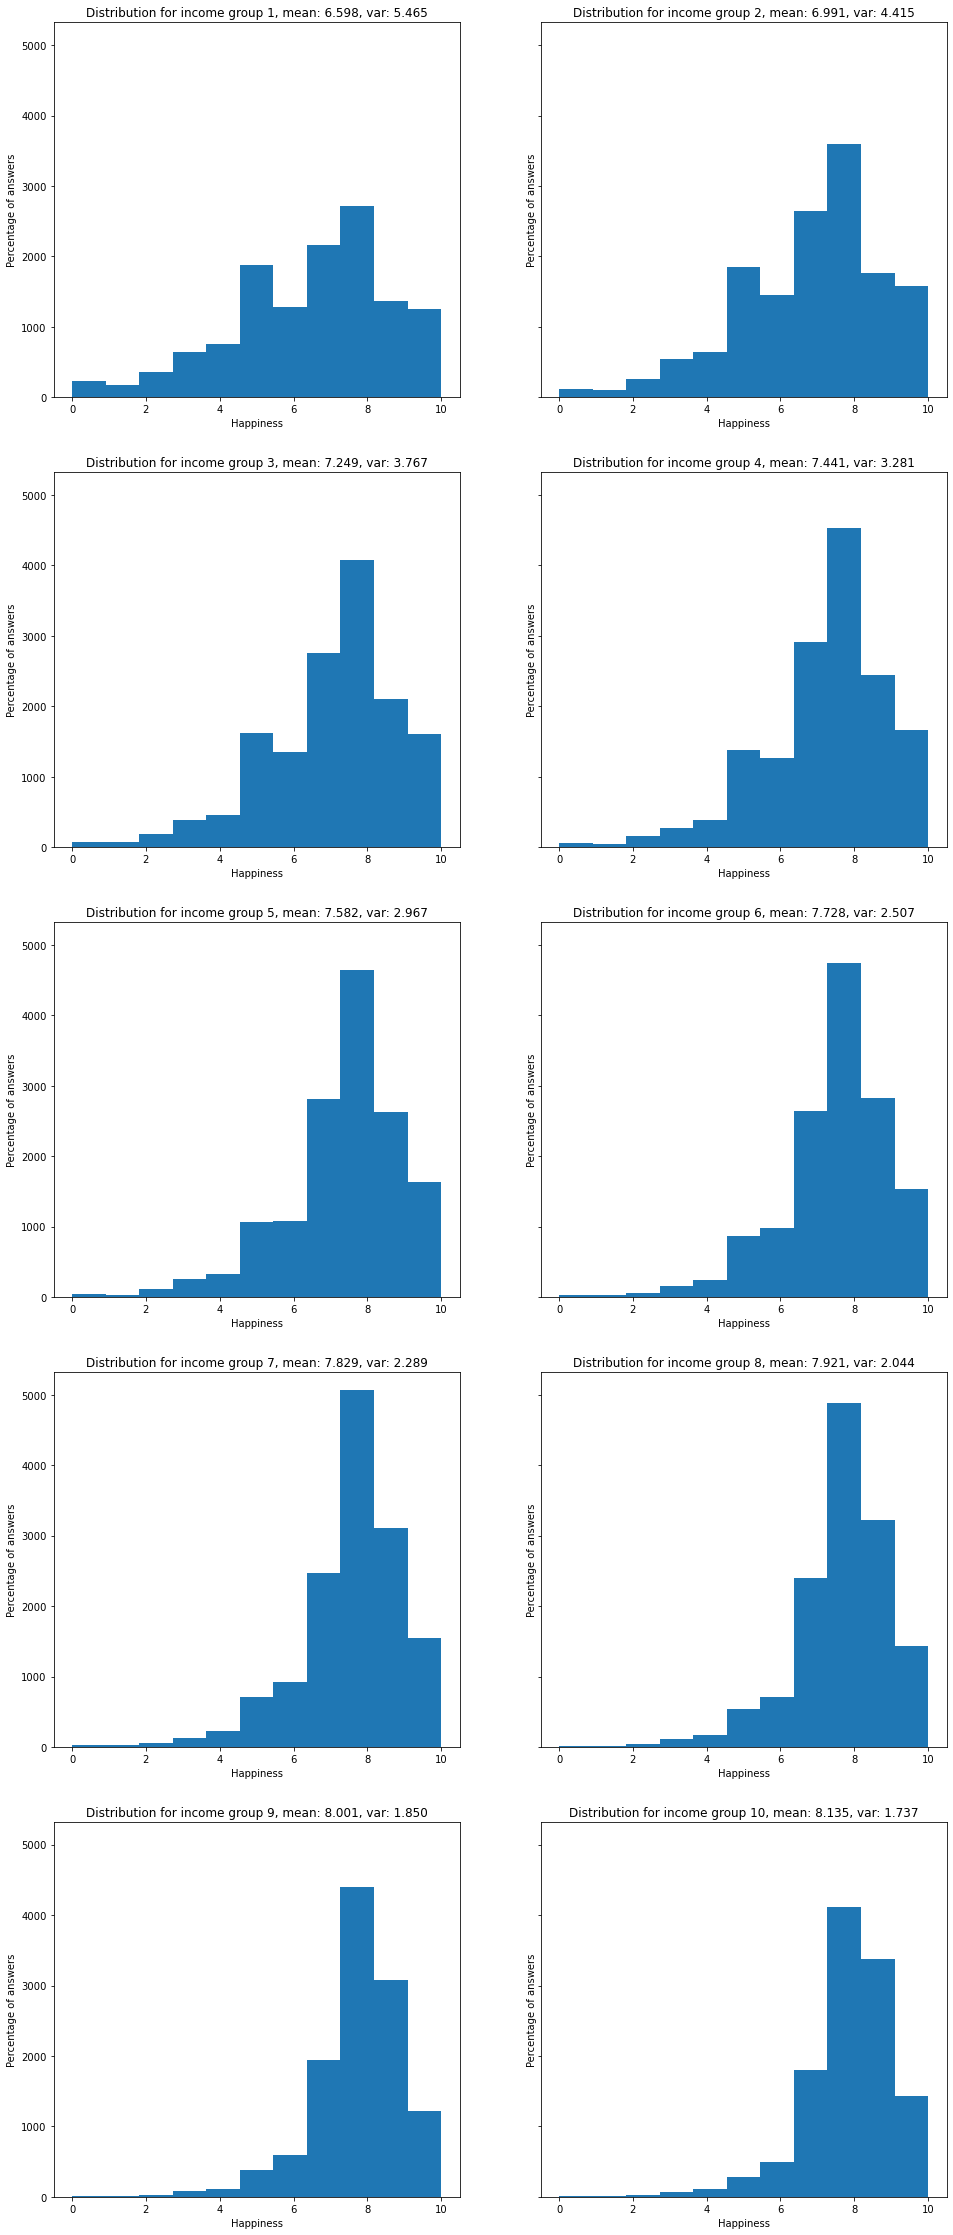

In [12]:
f, ax = plt.subplots(5, 2, sharey=True, figsize= [16,40])

# Get mean and variance for each income group:

means = []
variances = []
for i in range(10):
    
    # Calculate mean and variance for each income group
    means.append(ess_happy_and_income_4_9[ess_happy_and_income_4_9['Net income 4-9'] == i+1]['Happiness'].mean())
    variances.append(ess_happy_and_income_4_9[ess_happy_and_income_4_9['Net income 4-9'] == i+1]['Happiness'].var())
    
    # Plot data
    
    plot_row = int(i/2)
    plot_col = i%2    
    ax[plot_row, plot_col].hist(ess_happy_and_income_4_9[ess_happy_and_income_4_9['Net income 4-9'] == i+1]['Happiness'], bins=11)
    ax[plot_row, plot_col].set_xlabel('Happiness')
    ax[plot_row, plot_col].set_ylabel('Percentage of answers')
    ax[plot_row, plot_col].set_title('Distribution for income group %i, mean: %.3f, var: %.3f' %(i+1, means[i], variances[i]))
    


Looking at the distributions and their means and variances, it can be seen, that the mean happiness will constantly rise with higher income, but slows down the higher the income is. The variance on the other hand goes down with increasing income:

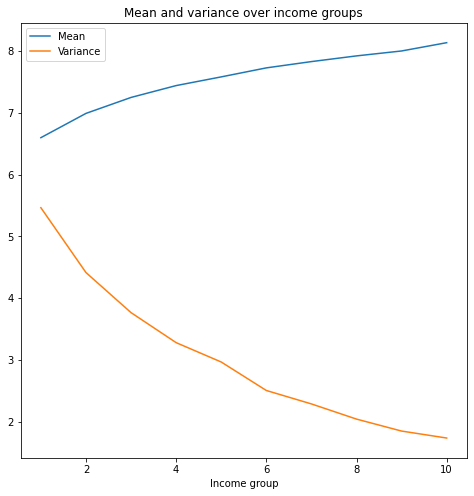

In [13]:
f, ax = plt.subplots(1, 1, sharey=True, figsize= [8,8])

ax.plot(range(1,11), means, label='Mean')
ax.plot(range(1,11), variances, label='Variance')
ax.set_title('Mean and variance over income groups')
ax.set_xlabel('Income group')
ax.legend()


## First conclusion:

By taking a look at the income and the happiness, it can be seen, that a higher income does correlate up to a certain amount with a higher level of happiness. Whereas the avergage gain of happines over more income is a lot higher within the lower than the higher income classes. So within the 

Although up to now we were looking at "countrywise normalized data". So at income groups within a certain country. So the conclusion so far only holds true by comparison to other ppl living within the same country.

Now I will hvae a look at the first three rounds of the ESS, where total amounts available were asked:

22.33% did not give an answer to the income question.


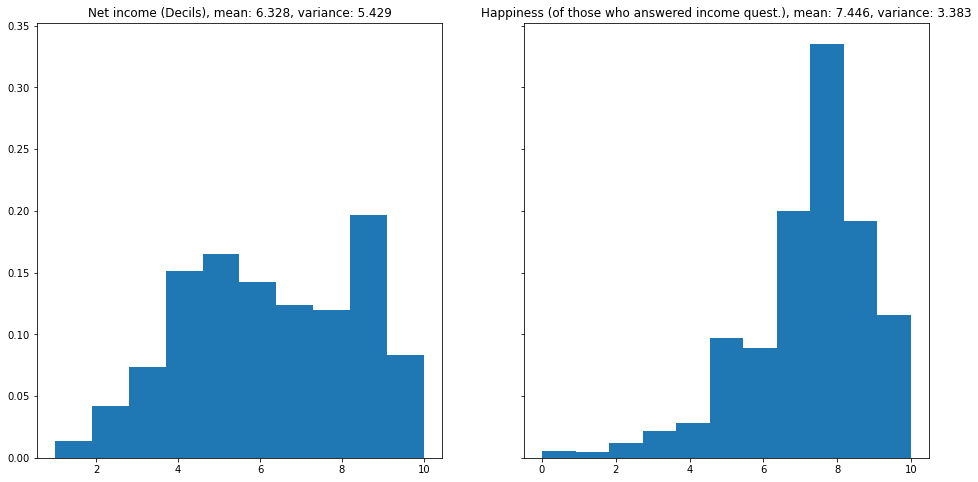

In [14]:
# Drop rows that don't contain the data needed

ess_happy_and_income_1_3 = ess_pp1.drop(ess_pp1[(ess_pp1['Net income 1-3'] > 10) | (ess_pp1['Happiness'] > 10)].index)
ess_happy_and_income_1_3 = ess_happy_and_income_1_3.dropna(subset=['Net income 1-3'])

# Look how many ppl did not answer the income question.

ess_income_1_3_all = ess_pp1.dropna(subset=['Net income 1-3'])
ess_income_1_3_valid = ess_income_1_3_all.drop(ess_income_1_3_all[(ess_income_1_3_all['Net income 1-3'] > 10)].index)


print('%.2f%% did not give an answer to the income question.' %((1 - (ess_income_1_3_valid.shape[0] / ess_income_1_3_all.shape[0])) * 100 ))

# Plot income and happiness figures

mean_hap = ess_happy_and_income_1_3['Happiness'].mean()
var_hap = ess_happy_and_income_1_3['Happiness'].var()
mean_inc = ess_happy_and_income_1_3['Net income 1-3'].mean()
var_inc = ess_happy_and_income_1_3['Net income 1-3'].var()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= [16,8])
ax1.hist(ess_happy_and_income_1_3['Net income 1-3'], density=True)
ax1.title.set_text('Net income (Decils), mean: %.3f, variance: %.3f' %(mean_inc, var_inc))
ax2.hist(ess_happy_and_income_1_3['Happiness'], density=True, bins=11)
ax2.title.set_text('Happiness (of those who answered income quest.), mean: %.3f, variance: %.3f' %(mean_hap, var_hap))

The happiness figure again looks a lot the same, which is as expected. The income figure however is far from uniform as in the other data.

Now I will also have a look at the correlation:


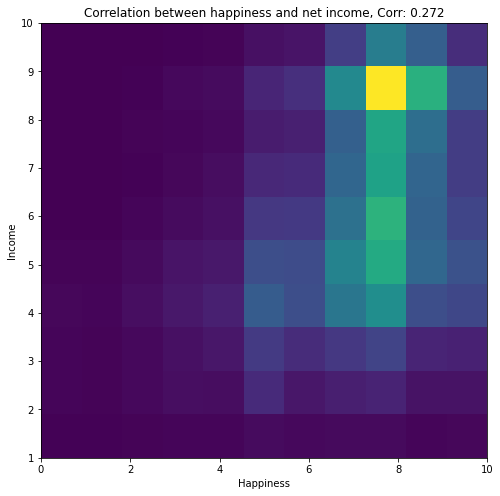

In [15]:
# Correlation

corr_hap_inc = ess_happy_and_income_1_3['Happiness'].corr(ess_happy_and_income_1_3['Net income 1-3'])

# Plot 

f, ax1 = plt.subplots(1, 1, sharey=True, figsize= [8,8])
ax1.hist2d(ess_happy_and_income_1_3['Happiness'], ess_happy_and_income_1_3['Net income 1-3'], bins=[11,10])
ax1.set_xlabel('Happiness')
ax1.set_ylabel('Income')
ax1.title.set_text('Correlation between happiness and net income, Corr: %.3f' %corr_hap_inc)

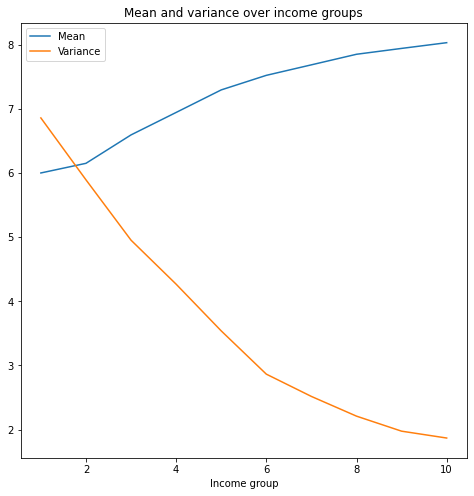

In [16]:
# Get mean and variance for each income group:

means = []
variances = []
for i in range(10):
    
    # Calculate mean and variance for each income group
    means.append(ess_happy_and_income_1_3[ess_happy_and_income_1_3['Net income 1-3'] == i+1]['Happiness'].mean())
    variances.append(ess_happy_and_income_1_3[ess_happy_and_income_1_3['Net income 1-3'] == i+1]['Happiness'].var())
    
# Plot mean and variance
f, ax = plt.subplots(1, 1, sharey=True, figsize= [8,8])

ax.plot(range(1,11), means, label='Mean')
ax.plot(range(1,11), variances, label='Variance')
ax.set_title('Mean and variance over income groups')
ax.set_xlabel('Income group')
ax.legend()

The trend seems to be the same as in the other data, but even stronger. The values for the higher income groups are very similar, but for the lower are more extrem than within the other questionair.

To find how, how much it depends on what you totally got and what you got compared to others within your country let's have a look at different countries happiness:

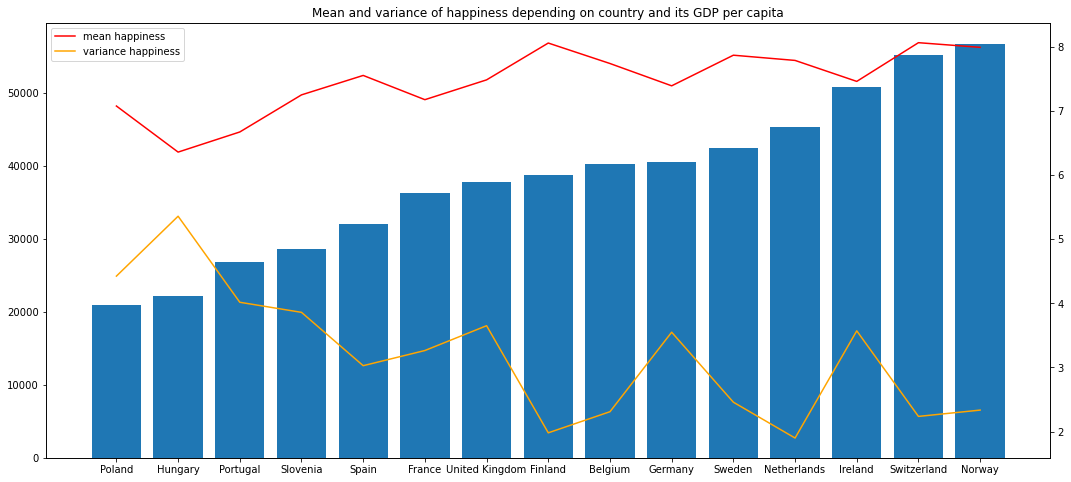

In [17]:
# Sort countries by average GDP per capita

countries_asc = gdp_data[2:-2].mean().sort_values()

mean_happ = []
var_happ = []
for key in countries_asc.keys():
    mean_happ.append(ess_pp1[(ess_pp1['country'] == key) & (ess_pp1['Happiness'] < 11)]['Happiness'].mean())
    var_happ.append(ess_pp1[(ess_pp1['country'] == key) & (ess_pp1['Happiness'] < 11)]['Happiness'].var())

f, ax = plt.subplots(1, 1, sharey=True, figsize= [18,8])
ax.bar(countries_asc.keys(), countries_asc)
ax2=ax.twinx()
ax2.plot(countries_asc.keys(), mean_happ, label='mean happiness', color='red')
ax2.plot(countries_asc.keys(), var_happ, label='variance happiness', color= 'orange')
ax2.set_title('Mean and variance of happiness depending on country and its GDP per capita')
ax2.legend()

## Second conclusion

It shows, that starting from a certain point, it seems like there is no real trend anymore. At the lower end with the exception of Poland, ther is a clear tren, but at an average of ~32000 GDP per capita there does not seem to be much of an increase anymore in average happiness. So maybe for people it is less important what they totally earn (above a low threshold), than what they earn in comparison to people they can relate to, e.g. people living in the same country.

What I find very interesting though is, that no matter from which angel I looked at the data so far, the lower the average happiness is, the higher is the variance and vice versa. So mayber there are different types of people? One big group thats happy no matter what there financial situation is like and another whose happiness correlates to the financial status?

The next thing I'm going to take a look at is the trend over time.


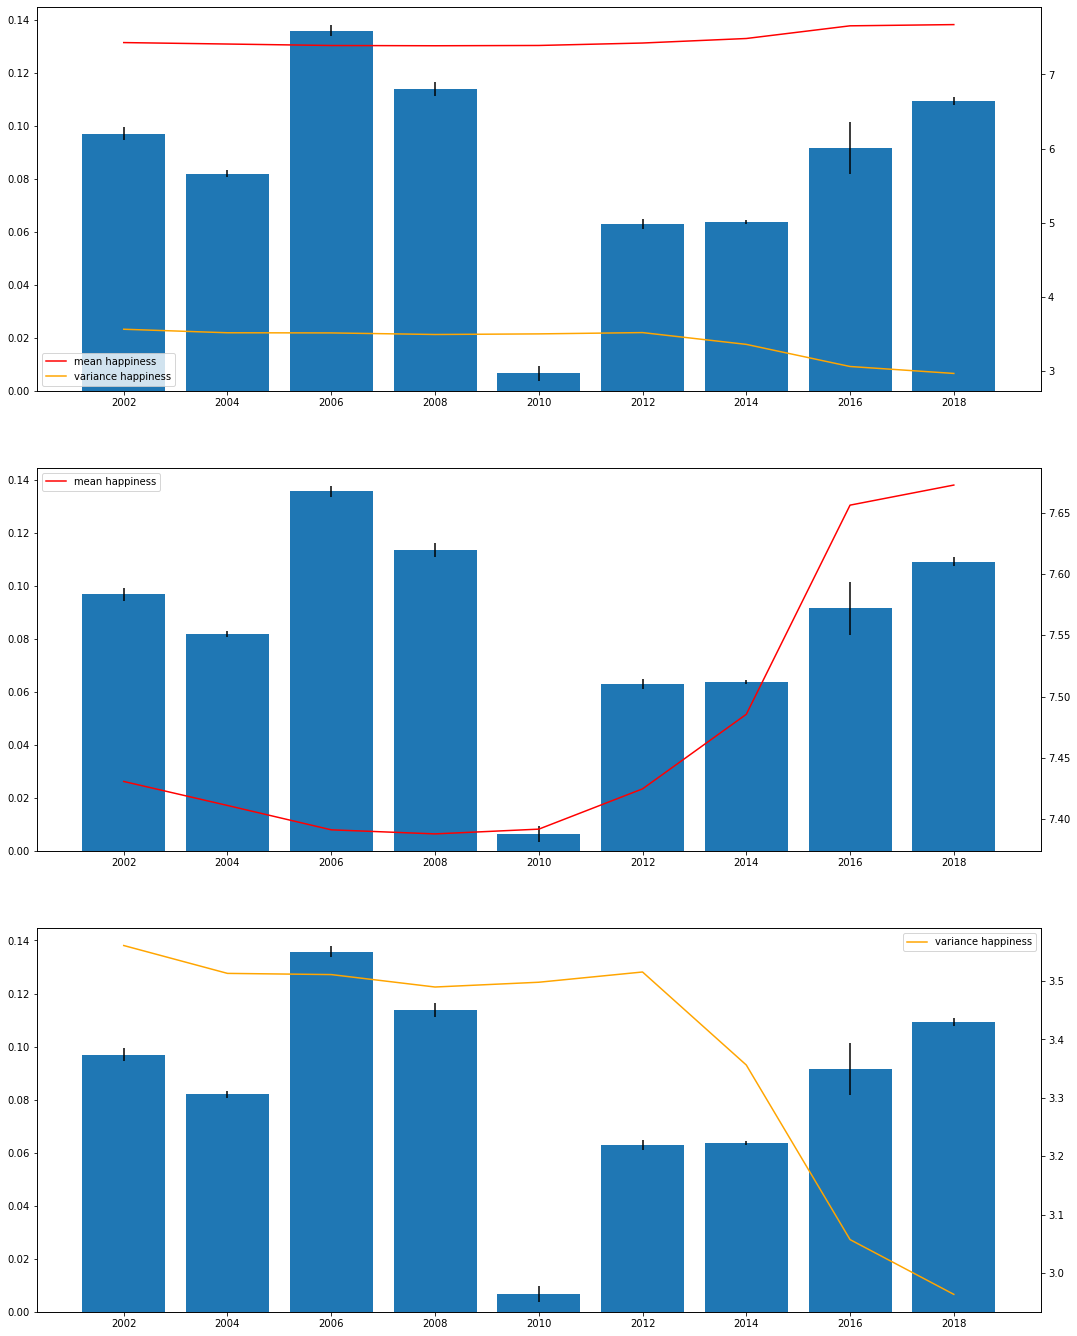

In [18]:
# Get all yrears of questionaires

relevant_years = ess_pp1['year'].unique()

# Get mean and variance of happiness for each year and also the complete distribution

happiness_mean = []
happiness_var = []
happiness_data = []

for year in relevant_years:
    happiness_mean.append(ess_pp1[(ess_pp1['year'] == year) & (ess_pp1['Happiness'] < 11)]['Happiness'].mean())
    happiness_var.append(ess_pp1[(ess_pp1['year'] == year) & (ess_pp1['Happiness'] < 11)]['Happiness'].var())
    happiness_data.append(ess_pp1[(ess_pp1['year'] == year) & (ess_pp1['Happiness'] < 11)])
    
    
# Now calculate the growth over the past two years for each country

gdp_two_years_cycle = gdp_data[gdp_data.index.isin(np.append('2000', relevant_years))]

gdp_two_years_cycle_growth = pd.DataFrame(index=relevant_years)

for column in gdp_two_years_cycle.columns:
    gdp_two_years_cycle_growth[column + '_growth'] = gdp_two_years_cycle[column].pct_change()
    
# Mean and variance of the growth of all countries for the two years cycles

mean_growth = gdp_two_years_cycle_growth.transpose().mean()
var_growth = gdp_two_years_cycle_growth.transpose().var()


# Plot 

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize= [18,24])
ax1.bar(relevant_years, mean_growth, yerr=var_growth)
ax1_1=ax1.twinx()
ax1_1.plot(relevant_years, happiness_mean, label='mean happiness', color='red')
ax1_1.plot(relevant_years, happiness_var, label='variance happiness', color= 'orange')
ax1_1.legend()
ax2.bar(relevant_years, mean_growth, yerr=var_growth)
ax2_1=ax2.twinx()
ax2_1.plot(relevant_years, happiness_mean, label='mean happiness', color='red')
ax2_1.legend()
ax3.bar(relevant_years, mean_growth, yerr=var_growth)
ax3_1=ax3.twinx()
ax3_1.plot(relevant_years, happiness_var, label='variance happiness', color= 'orange')
ax3_1.legend()


At first sight it looks like, the trend over time does not seem to play much of a role. Djuring the financial and euro crisis the happiness was a bit lower, and significatnly picked up after 2010, but the total values are within a very close range and are much less significant than the other measures.

Next I will have a closer look at individual countries, since they coped very differnent with crisis:

Text(0.5, 1.0, 'Variance of happiness over years')

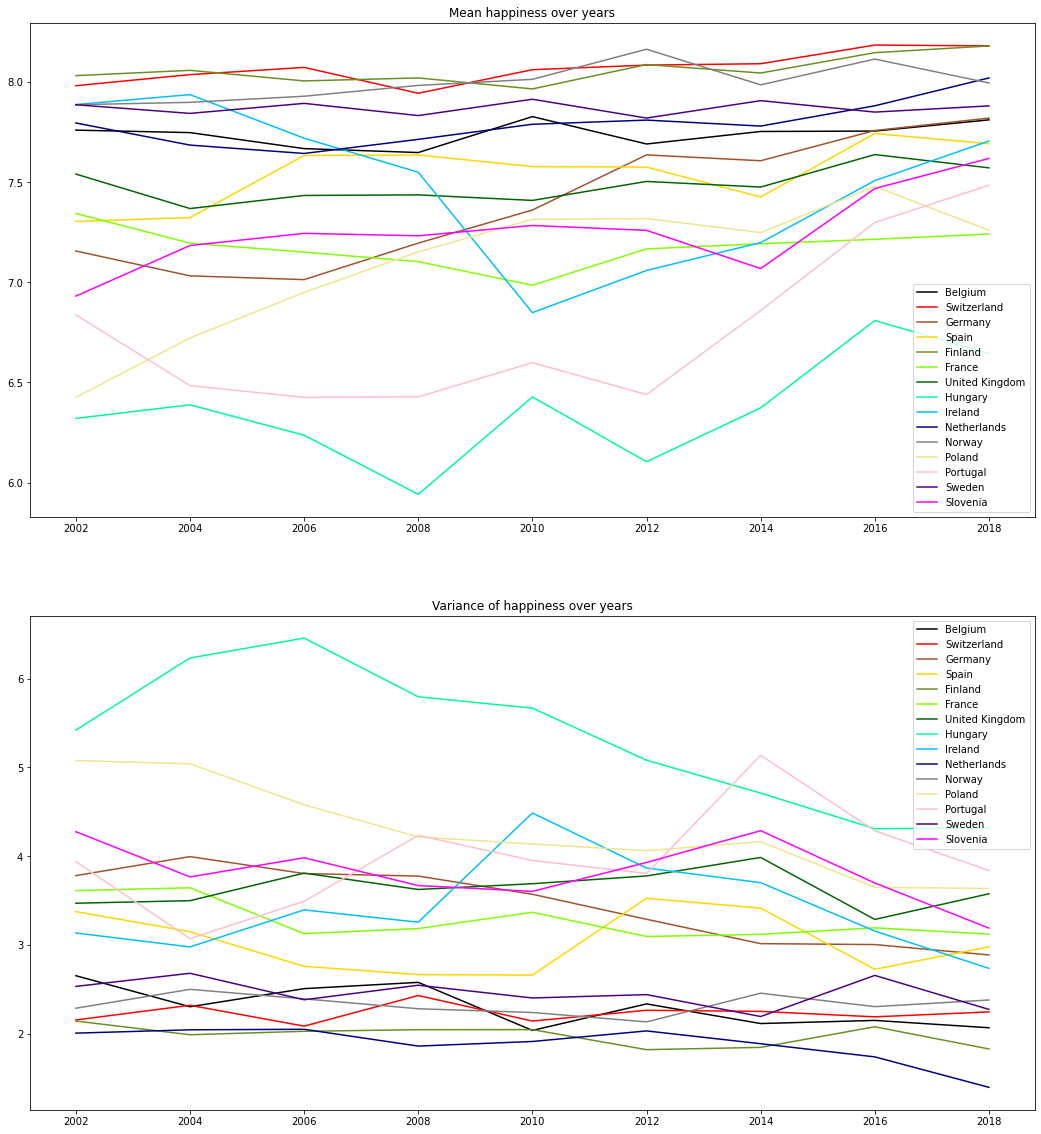

In [19]:
relevant_countries = ess_pp1['country'].unique()
colors= ['black', 'red', 'sienna', 'gold', 'olivedrab', 'chartreuse', 'darkgreen', 'mediumspringgreen', 'deepskyblue', 'navy', 'gray', 'khaki', 'pink', 'indigo', 'magenta']

mean_happiness = pd.DataFrame(index=relevant_years, columns=relevant_countries)
var_happiness = pd.DataFrame(index=relevant_years, columns=relevant_countries)
for country in relevant_countries:
    for year in relevant_years:
        mean_happiness[country][year] = ess_pp1[(ess_pp1['year'] == year) & (ess_pp1['Happiness'] < 11)& (ess_pp1['country'] == country)]['Happiness'].mean()
        var_happiness[country][year] = ess_pp1[(ess_pp1['year'] == year) & (ess_pp1['Happiness'] < 11)& (ess_pp1['country'] == country)]['Happiness'].var()
                             
# Plot man happiness over time for different countries
                             
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize= [18,20])
for i in range(len(relevant_countries)):
    ax1.plot(relevant_years, mean_happiness[relevant_countries[i]], label=relevant_countries[i], color = colors[i])
    ax2.plot(relevant_years, var_happiness[relevant_countries[i]], label=relevant_countries[i], color = colors[i])
    
    
ax1.legend()
ax1.set_title('Mean happiness over years')
ax2.legend()
ax2.set_title('Variance of happiness over years')



Looking at the development over time of different countries, this suddenly looks a lot different. While some countries, especially the scandinavian and Switzerland stayed pretty much the same over time on a very high level, others have huge changes. Especially Ireland, Portugal an Hungary and partly also Germany and Poland. So I will have a closer look at these:

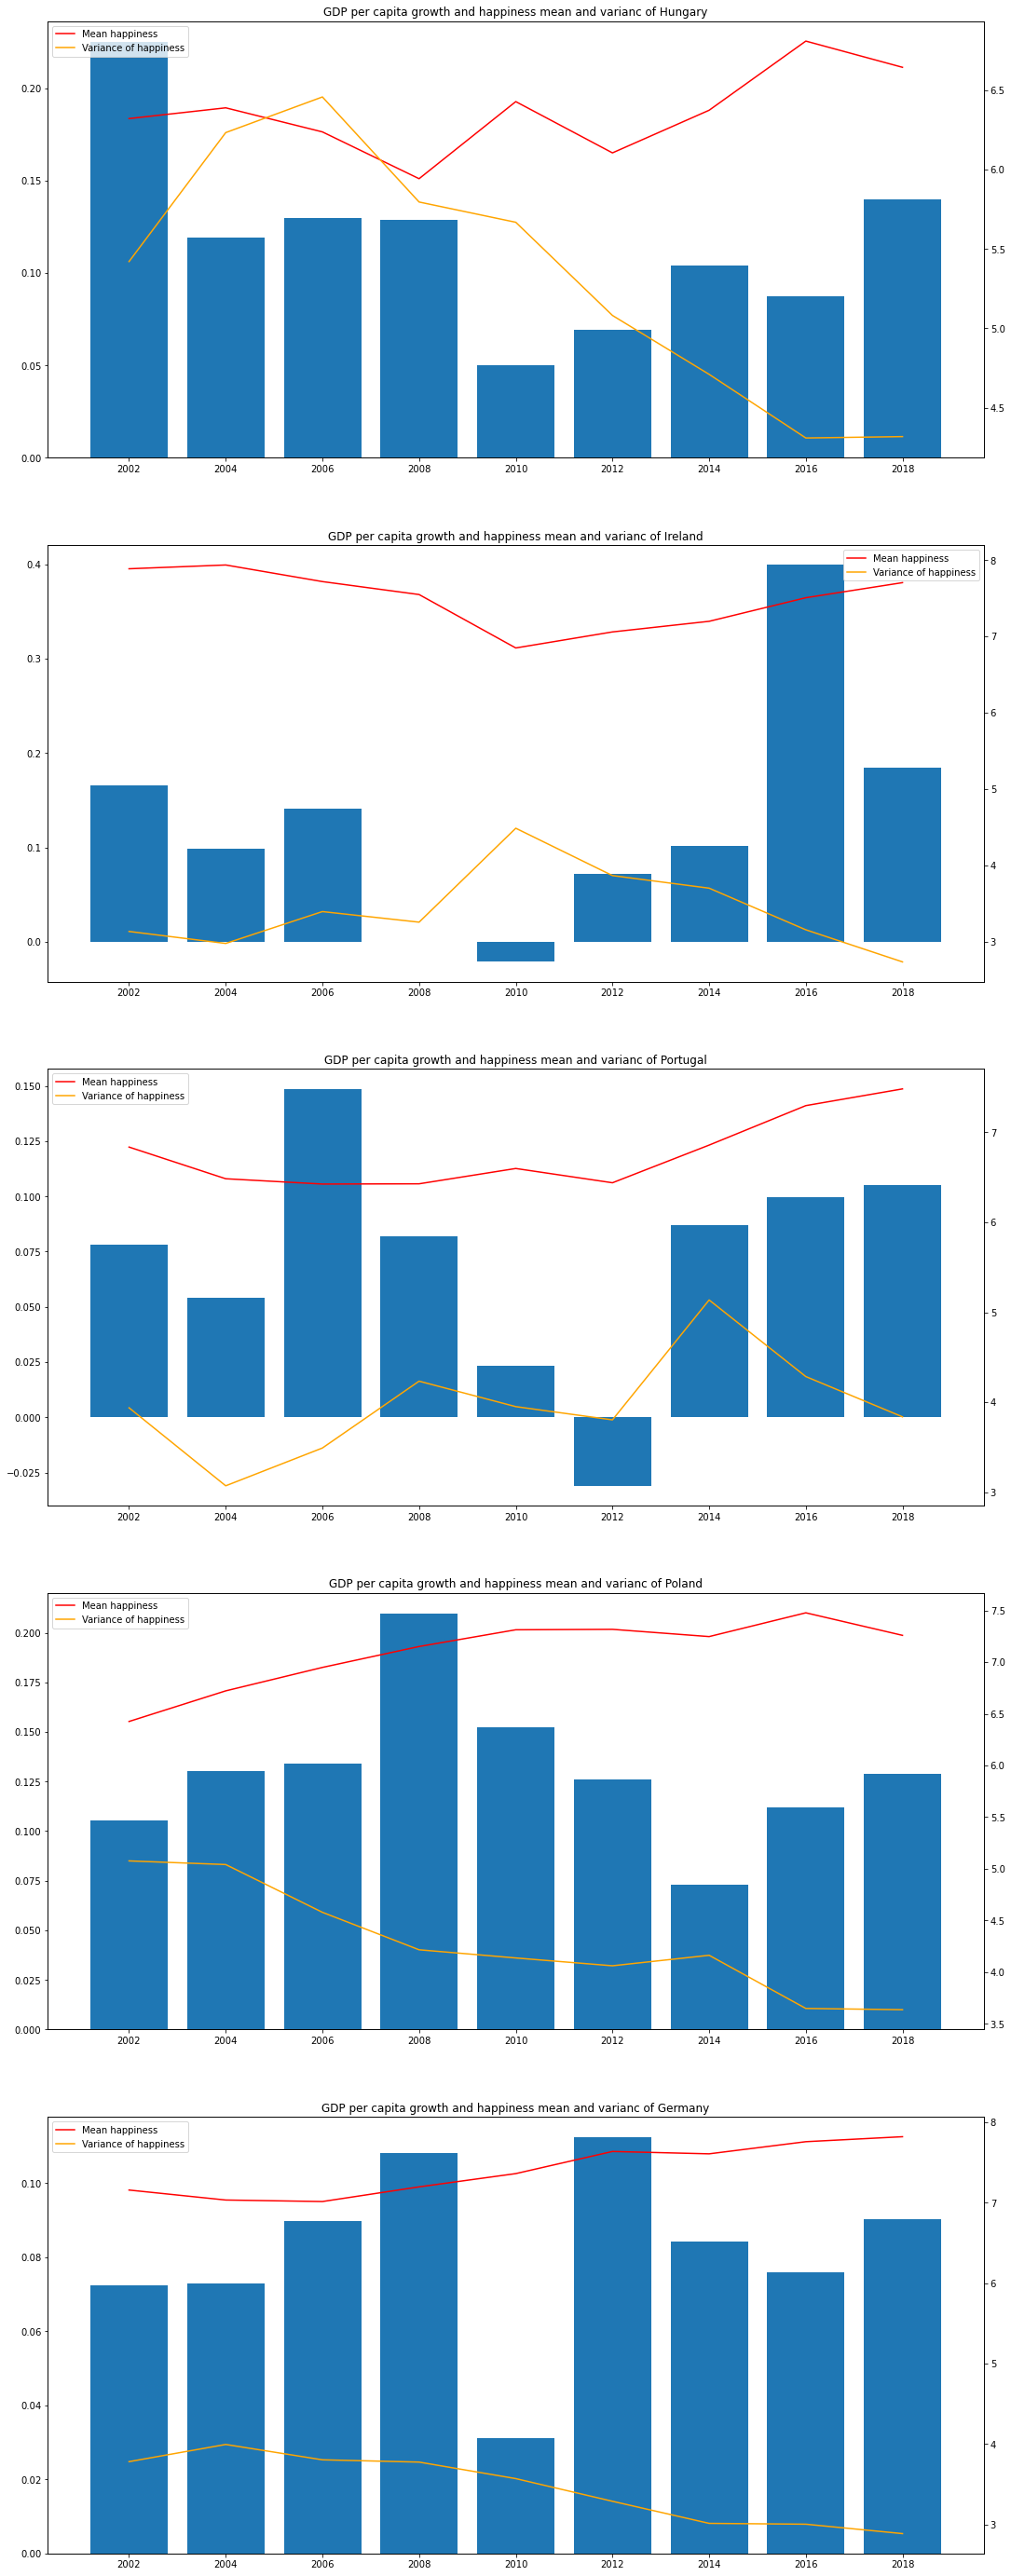

In [20]:
variable_countries = ['Hungary', 'Ireland', 'Portugal', 'Poland', 'Germany']


f, ax = plt.subplots(len(variable_countries), 1, sharey=False, figsize= [18,50])

for i in range(len(variable_countries)):
    ax[i].bar(relevant_years, gdp_two_years_cycle_growth[variable_countries[i]+'_growth'])
    newax = ax[i].twinx()
    newax.plot(relevant_years, mean_happiness[variable_countries[i]], label='Mean happiness', color='red')
    newax.plot(relevant_years, var_happiness[variable_countries[i]], label='Variance of happiness', color='orange')
    newax.legend()
    newax.set_title('GDP per capita growth and happiness mean and varianc of %s'%variable_countries[i])

Now I will have a look at the rather stable countries like Sweden, Norway, Finland and Switzerland.

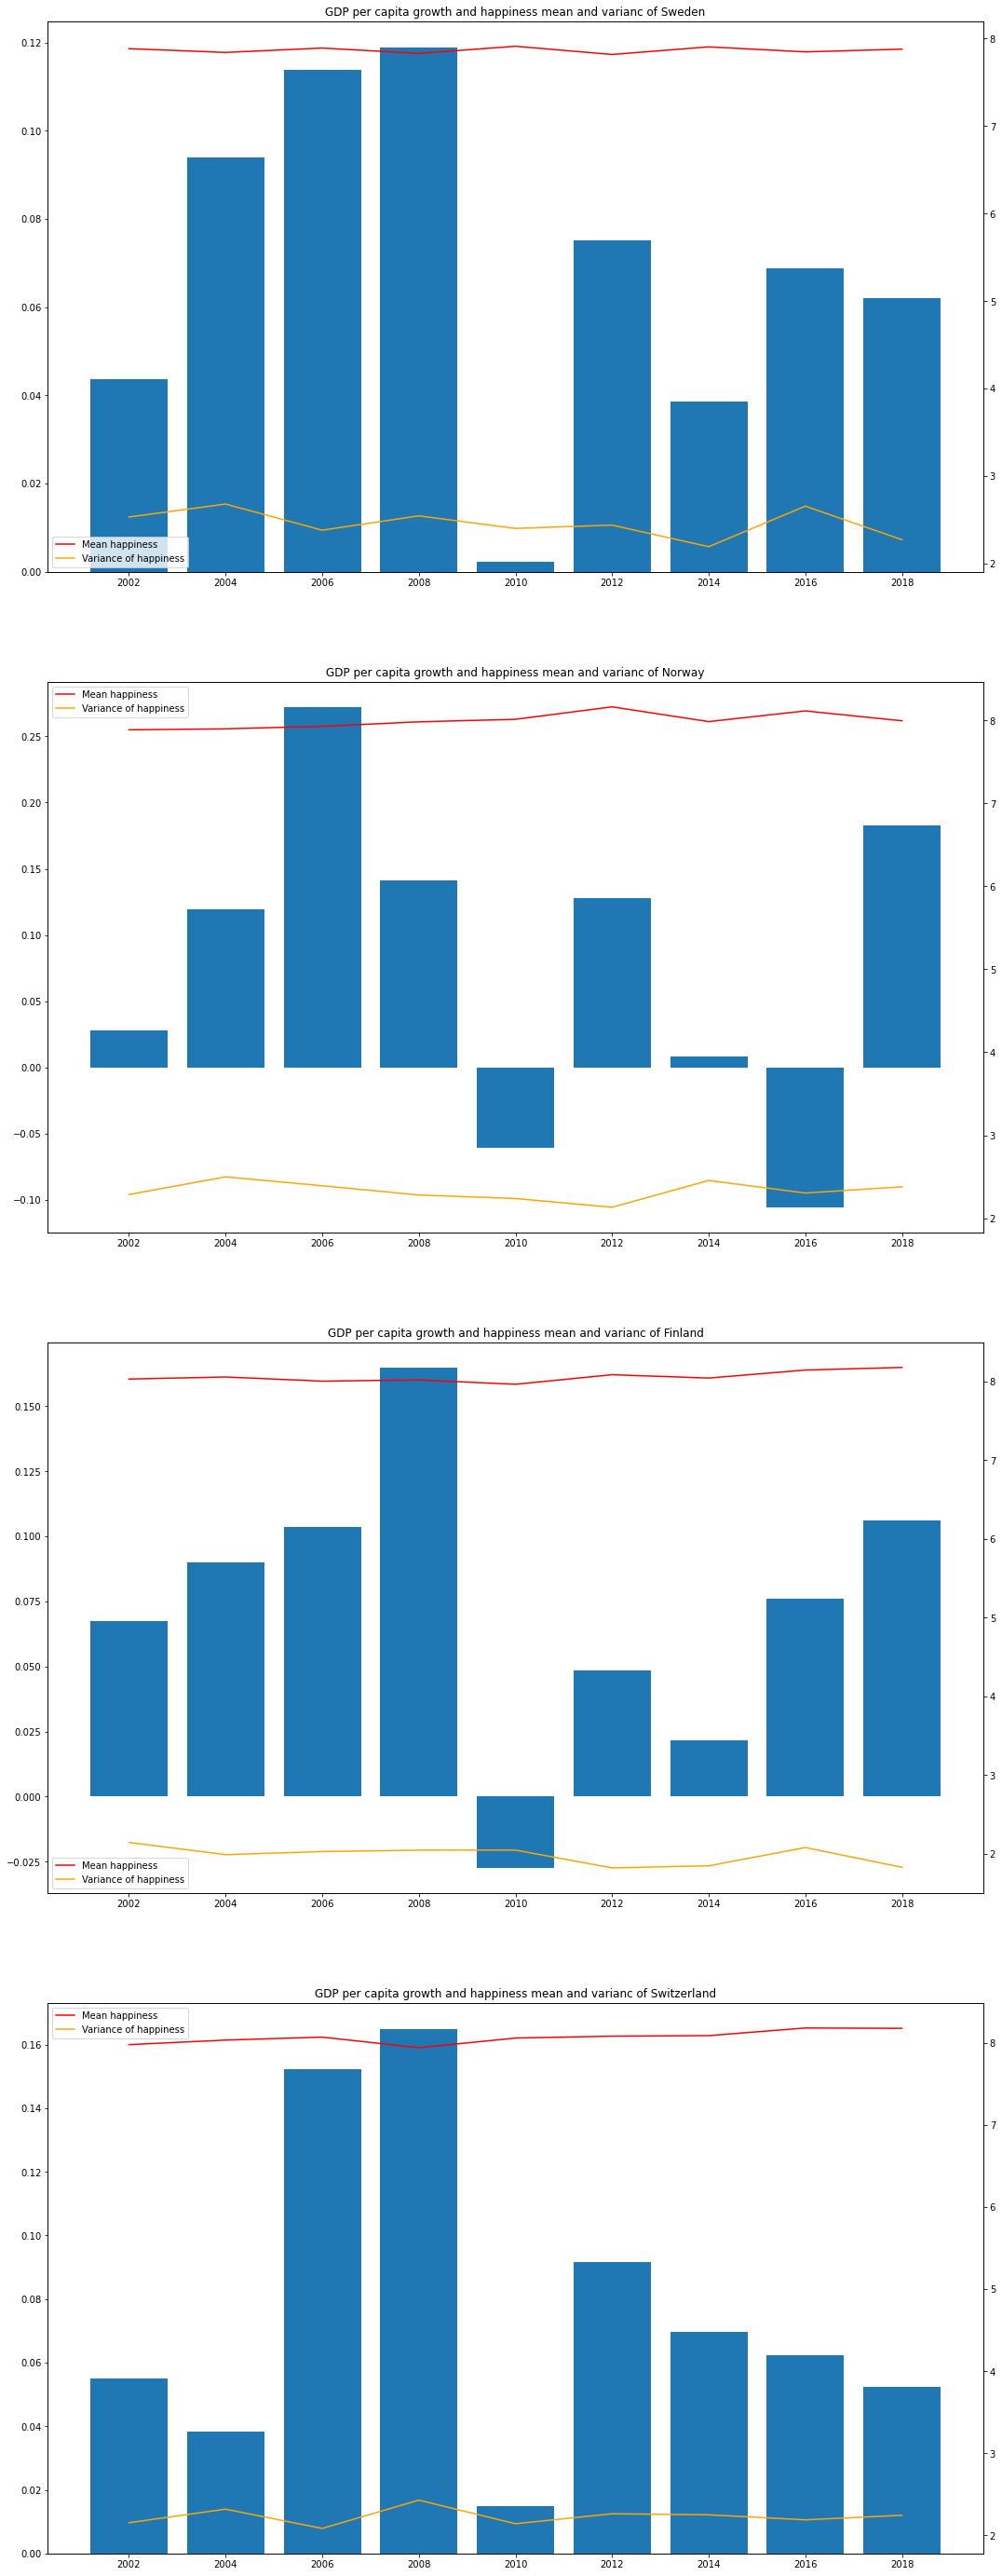

In [21]:
stable_countries = ['Sweden', 'Norway', 'Finland', 'Switzerland']

f, ax = plt.subplots(len(stable_countries), 1, sharey=False, figsize= [18,50])

for i in range(len(stable_countries)):
    ax[i].bar(relevant_years, gdp_two_years_cycle_growth[stable_countries[i]+'_growth'])
    newax = ax[i].twinx()
    newax.plot(relevant_years, mean_happiness[stable_countries[i]], label='Mean happiness', color='red')
    newax.plot(relevant_years, var_happiness[stable_countries[i]], label='Variance of happiness', color='orange')
    newax.legend()
    newax.set_title('GDP per capita growth and happiness mean and varianc of %s'%stable_countries[i])

In some of the variable countries there can be seen a certain relationship between economical growth and happiness, especially Ireland, that came from a very high state and got into a big crisis djuring the financial crisis. In other countries on the other hand, this relationship cannot be seen.


Within the stable countries, the changes in economical growth seem to be within an equal range, so maybe except for extreme situations like in Ireland, surprisingly in general there can't be stated, that there is a huge correlation between general happiness and the gdp per capita.

# Conclusion

In conclusion there are a few things that are interesting. 

First of all, unsurprisngly, there is a correlation between average happines and income. But it is not relevant in all categories. Looking at the countries and their gdp per capita, it can be said that above a certain level between $30k - $35k there is not much of an influence anymore. Above that threshold it is not as important anymore what you got, but rather what you got in camparison to other ppl within your country.

Within the distribution of each country it can be seen, that higher income groups are happier, but that the increase in happiness slows down significantly the higher you get.

The general development of a countries gdp per capita on the other hand, surprisingly does not seem to have much of a relevance to the average happiness. Maybe with the exception of extreme scenarios. But in general it looks like that the influence is a lot lower than I expected it to be.

The last thing that could be observed is, that the lower the average happiness the higher is its variance. So there seem to be at least two groups of people. Those whose happiness is a lot affected be their income, and those who are happy more or less independently of there income.

# Appendix

I was really wondering about the changes in norwegian gdp per capita. After a bit of research I found out that Norway has a rather small popultaion (~6-7 Million) and huge oil reserves. So those changes mainly came from the change in the crude oil price, as can be seen below:

Data from https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=F000000__3&f=A


Text(0.5, 1.0, 'comparison of crude oil price and norwegian gdp per capita')

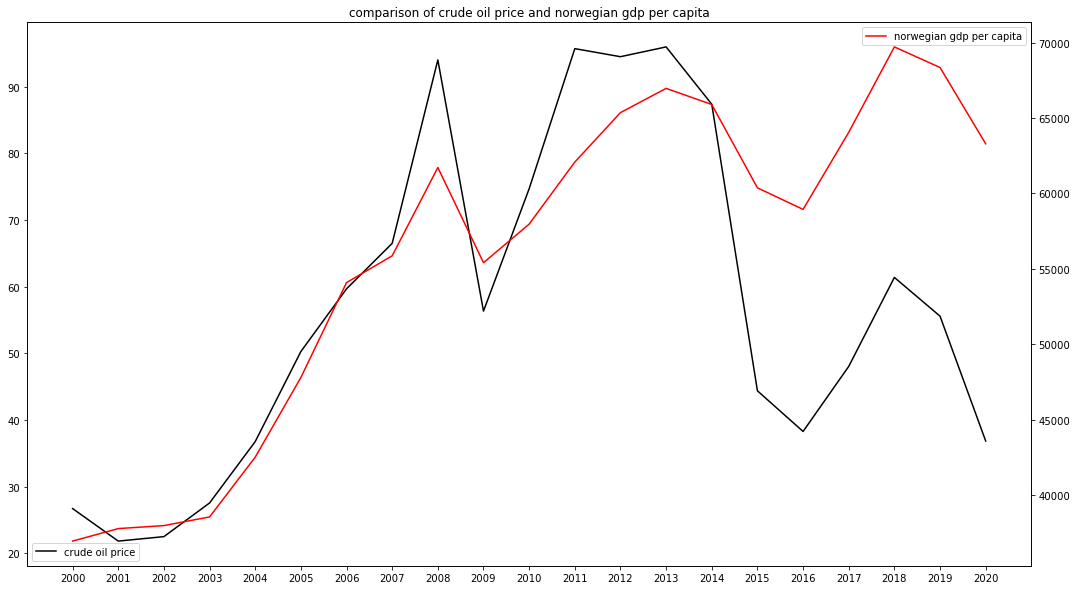

In [23]:
crude_oilprices = pd.read_csv('U.S._Crude_Oil_First_Purchase_Price.csv').set_index('Year').transpose()
gdp_years = gdp_data.index
oilprices = []
for year in gdp_years:
    oilprices.append(crude_oilprices[int(year)]['U.S. Crude Oil First Purchase Price Dollars per Barrel'])

f, ax = plt.subplots(1, 1, sharey=False, figsize= [18,10])

ax.plot(gdp_years, oilprices, label='crude oil price', color='black')
ax.legend(loc='lower left')
ax2=ax.twinx()
ax2.plot(gdp_years, gdp_data['Norway'], label='norwegian gdp per capita', color='red')
ax2.legend(loc='upper right')
ax2.set_title('comparison of crude oil price and norwegian gdp per capita')